In [27]:
import pandas as pd
import matplotlib.pyplot as lib
import numpy as np
import seaborn as sb
import math

In [28]:
housing = pd.read_csv("housing.csv")

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Histogram

Text(0.5, 0, 'Housing prices')

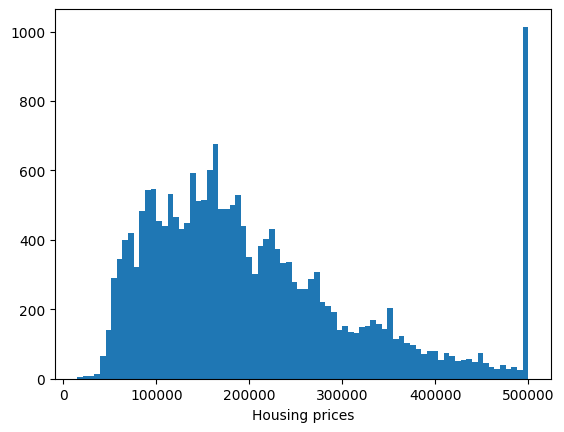

In [30]:
lib.hist(housing['median_house_value'], bins=80)

lib.xlabel("Housing prices")


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

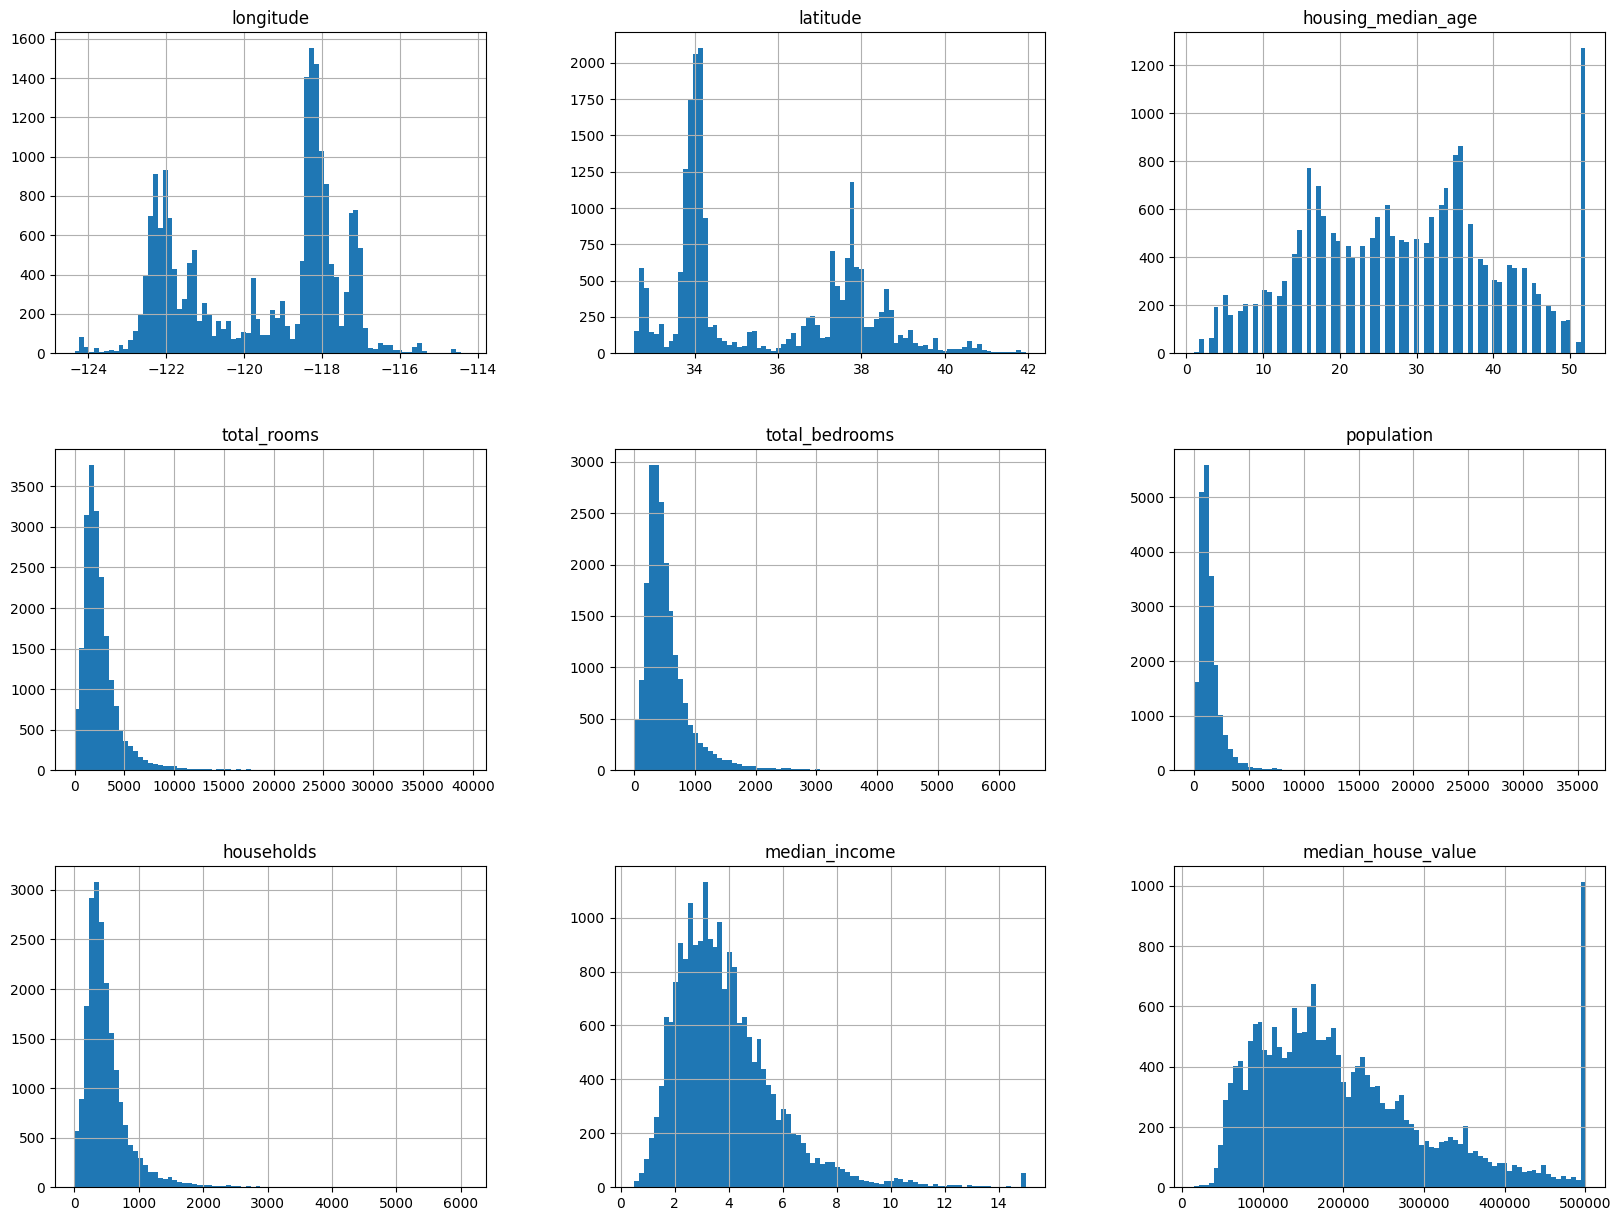

In [31]:
housing.hist(bins=80, figsize=(20,15))

# Heat Map

In [32]:
corr= housing.corr(numeric_only=True)
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

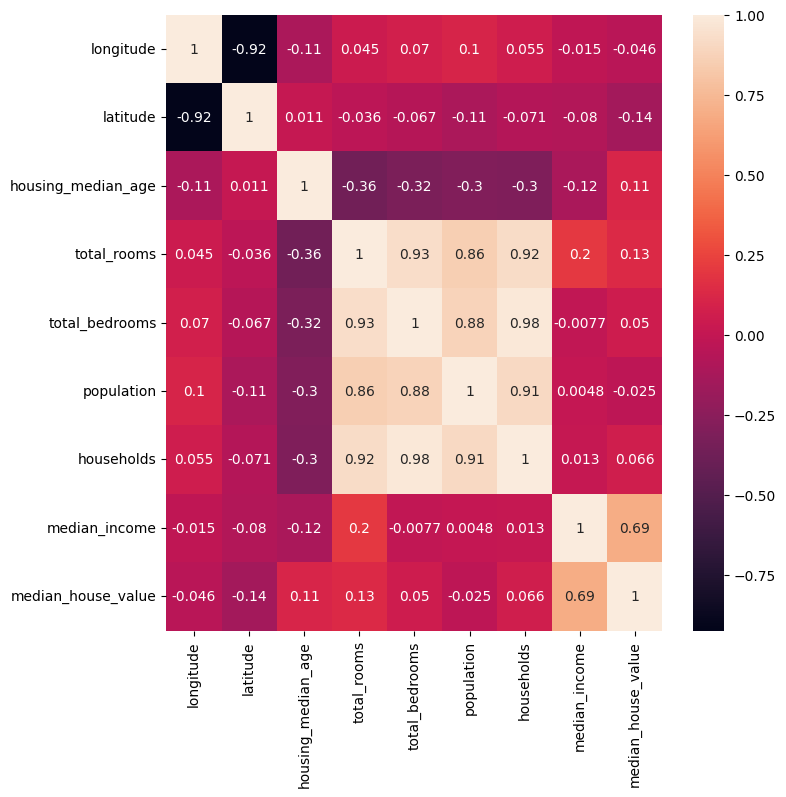

In [64]:
lib.figure(figsize=(8,8))
sb.heatmap(corr, annot=True)
lib.show()

In [33]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [40]:
# filing missing values of bedroom using KNN(k nearest neighbour)
from sklearn.impute import KNNImputer

temp_housing = housing.copy()

column_list = [col for col in temp_housing.columns if temp_housing[col].dtype !='object']

print(column_list)
new_column_list =[ col for col in temp_housing.loc[:, temp_housing.isnull().any()]]
print(new_column_list)

temp_housing= temp_housing[new_column_list]

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
['total_bedrooms']


In [43]:
# now training and getting values using KNN

knn = KNNImputer(n_neighbors = 3)
#training knn model
knn.fit(temp_housing)
#transforming data
array_list=knn.transform(temp_housing)
temp_housing= pd.DataFrame(array_list, columns=new_column_list)

In [44]:
temp_housing.isnull().sum()

total_bedrooms    0
dtype: int64

In [49]:
# replace data in original file

for column_name in  new_column_list:
    housing[column_name] = temp_housing.replace(housing[column_name],temp_housing[column_name])


In [50]:
# creating new features(feature engineering)

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing['cords']= housing['longitude']/housing['latitude']

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  cords                     20640 non-null  float64
dtypes: flo

In [51]:
housing.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
cords                       0
dtype: int64

In [52]:
#removing features that are not needed

housing = housing.drop('total_rooms', axis=1)
housing = housing.drop('population', axis=1)
housing = housing.drop('longitude', axis=1)
housing = housing.drop('latitude', axis=1)
housing = housing.drop('households', axis=1)

In [54]:
housing = housing.drop('total_bedrooms', axis=1)

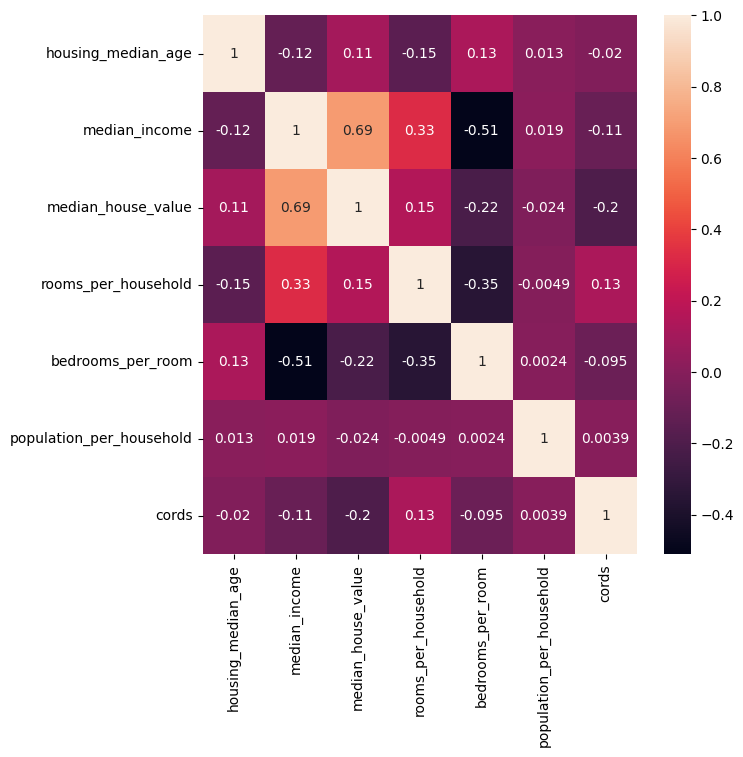

In [55]:
corr= housing.corr(numeric_only=True)

lib.figure(figsize=(7,7))
sb.heatmap(corr, annot=True)
lib.show()

In [56]:
# using one hot encoding to convert categorical data into numerical data

housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [57]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [62]:
print(pd.get_dummies(housing.ocean_proximity,dtype=int))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [64]:
encoded_housing = pd.get_dummies(data=housing, columns=['ocean_proximity'])
encoded_housing.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,cords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False
